<a href="https://colab.research.google.com/github/tpezzin/rna/blob/main/Reuters_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape
     


2110848/2110848 [==============================] - 0s 0us/step


((8982,), (8982,), (2246,), (2246,))

In [ ]:
train_data[0:1], train_labels[0:1]
     


(array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])],
       dtype=object),
 array([3]))

In [ ]:
def decode_words(word_index, sentence):
    reverse_word_index = dict(
        [(value, key) for (key, value) in word_index.items()]
    )
    return " ".join(
        [reverse_word_index.get(i-3, "?") for i in sentence]
    )
decode_words(reuters.get_word_index(), train_data[0])

550378/550378 [==============================] - 0s 0us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
import numpy as np
from keras.utils.np_utils import to_categorical

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = to_categorical(train_labels.astype("int32"))
y_test = to_categorical(test_labels.astype("int32"))



x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8982, 10000), (8982, 46), (2246, 10000), (2246, 46))

In [ ]:
from keras.engine.training import optimizer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
n_val = 1000
x_val = x_train[:n_val]
partial_x_train = x_train[n_val:]

y_val = y_train[:n_val]
partial_y_train = y_train[n_val:]

x_val.shape, partial_x_train.shape, y_val.shape, partial_y_train.shape

((1000, 10000), (7982, 10000), (1000, 46), (7982, 46))

In [ ]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

Epoch 1/20
16/16 [==============================] - 5s 179ms/step - loss: 2.7050 - accuracy: 0.5069 - val_loss: 1.8623 - val_accuracy: 0.5990
Epoch 2/20
16/16 [==============================] - 2s 111ms/step - loss: 1.5426 - accuracy: 0.6706 - val_loss: 1.4099 - val_accuracy: 0.6770
Epoch 3/20
16/16 [==============================] - 2s 95ms/step - loss: 1.1737 - accuracy: 0.7412 - val_loss: 1.1834 - val_accuracy: 0.7360
Epoch 4/20
16/16 [==============================] - 2s 107ms/step - loss: 0.9653 - accuracy: 0.7879 - val_loss: 1.0849 - val_accuracy: 0.7710
Epoch 5/20
16/16 [==============================] - 1s 53ms/step - loss: 0.8055 - accuracy: 0.8262 - val_loss: 0.9957 - val_accuracy: 0.7890
Epoch 6/20
16/16 [==============================] - 1s 84ms/step - loss: 0.6741 - accuracy: 0.8567 - val_loss: 0.9524 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 1s 86ms/step - loss: 0.5647 - accuracy: 0.8776 - val_loss: 0.9353 - val_accuracy: 0.7970
Epoch 8/20

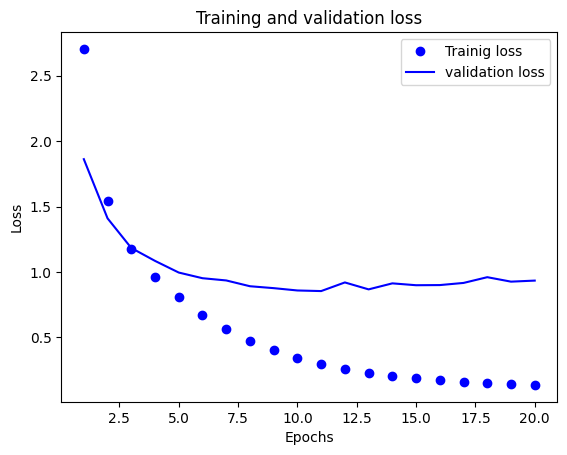

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Trainig loss")
plt.plot(epochs, val_loss_values, "b", label="validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()